In [51]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [52]:
df = pd.read_csv('summary.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 11 columns):
status         8 non-null object
resource       7 non-null object
bench          8 non-null object
bram_used      8 non-null int64
dsp_used       8 non-null int64
lut_used       8 non-null int64
lutmem_used    8 non-null int64
reg_used       8 non-null int64
uram_used      8 non-null int64
runtime_avg    8 non-null float64
runtime_std    8 non-null float64
dtypes: float64(2), int64(6), object(3)
memory usage: 784.0+ bytes


In [54]:
df.at[0, 'resource'] = 'Default'

In [55]:
keys = [
    'lut_used',
    'lutmem_used',
    'bram_used',
    'dsp_used',
    'reg_used',
    'runtime_avg',
]

Text(0.5, -0.02, 'Resource Cores - Absolute Resource Usages')

<Figure size 432x288 with 0 Axes>

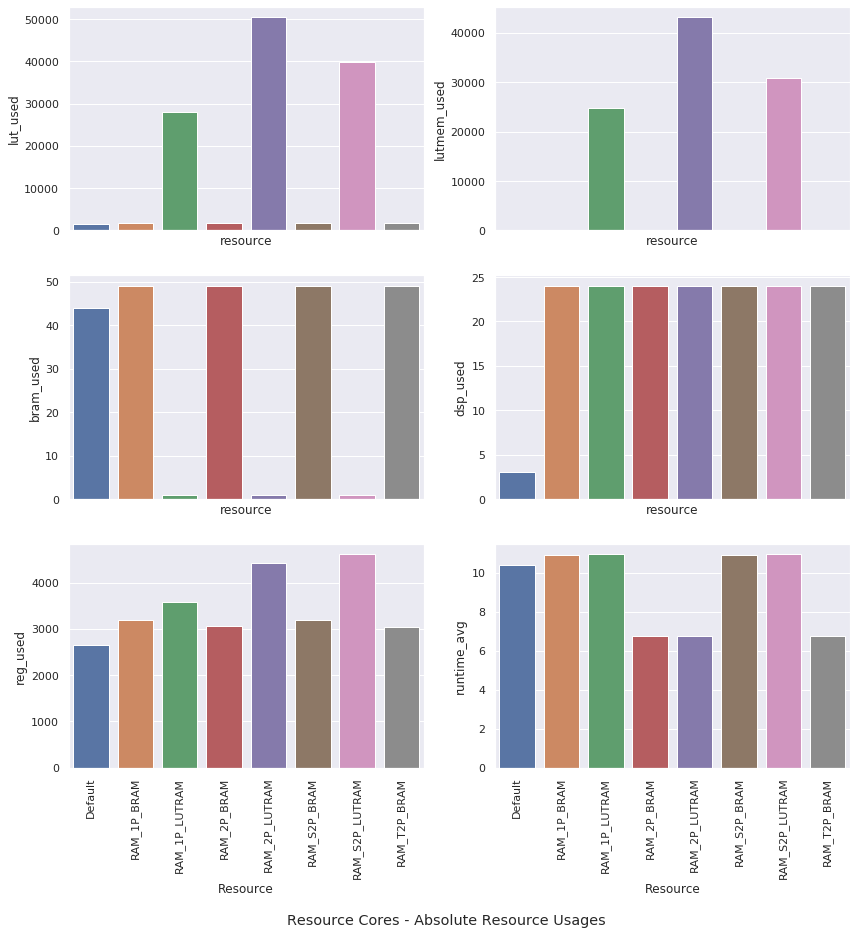

In [56]:
plt.figure()
sns.set()

# Configuration for subplot
cols = 2
rows = int(len(keys) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(14, 14), sharex=True)
pal = sns.color_palette('husl', 8)

for idx, key in enumerate(keys):
    # Get current axes for the subplot
    ax = axes[int(idx / cols), idx % cols]
    sns.barplot(x='resource', y=key, data=df, ax=ax)
    ax.set_ylabel(key)
        
for col in range(cols):
    axes[rows - 1, col].set(xlabel='Resource')
    axes[rows - 1, col].set_xticklabels(df['resource'], rotation=90)
    
fig.suptitle('Resource Cores - Absolute Resource Usages', y=-0.02)

In [57]:
fig.savefig('absolute.png', dpi=300)

## Configuration

The experiment uses a simple GeMM kernel with three loop nests. All memories are partitioned by 4 and the inner most loop is unrolled by 8.

## Analysis

- The `Default` configuration has no `RESOURCE` annotation on the arrays and lets Vivado figure out which cores to use. It ends up consuming less `bram` than the normal `_RAM`. It is unclear why this happens.

- The more surprising result here is that the inferred memory for in the default case doesn't give the best performance. I would've assumed that the compiler can infer the right number of ports for a simple loop nest like GeMM.

## Conclusion

Somewhat unsurprising that the `RAM_2P` cases deliver the best performance since the number of ports * banks matches the unrolling factor.